In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg
from skimage.color import label2rgb
from skimage.metrics import adapted_rand_error
import os

# Folder containing images
image_folder = "C:/Users/USER/Desktop/test/images/"  # Change to your actual folder path
output_folder = "C:/Users/USER/Desktop/test/masks"
os.makedirs(output_folder, exist_ok=True)


In [53]:
def segment_kmeans(image_path, k=3):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Reshape image into a 2D array of pixels and 3 color values (RGB)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # Define criteria and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert centers to uint8 and reshape labels back to image dimensions
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()].reshape(image.shape)
    
    return segmented_image

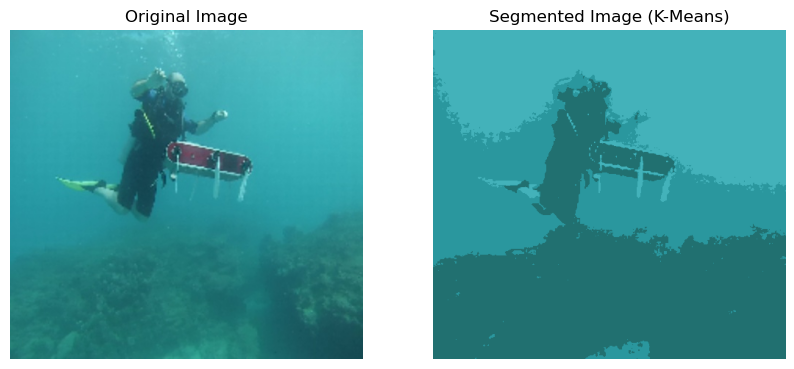

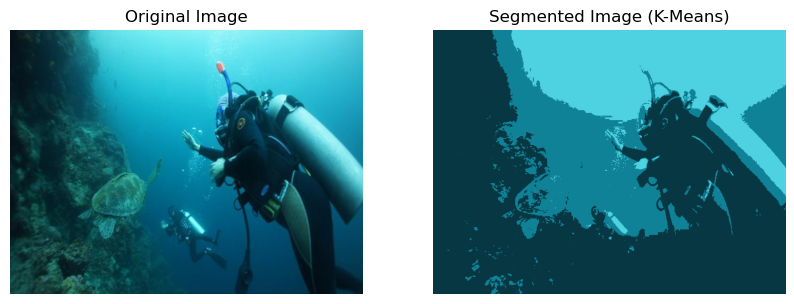

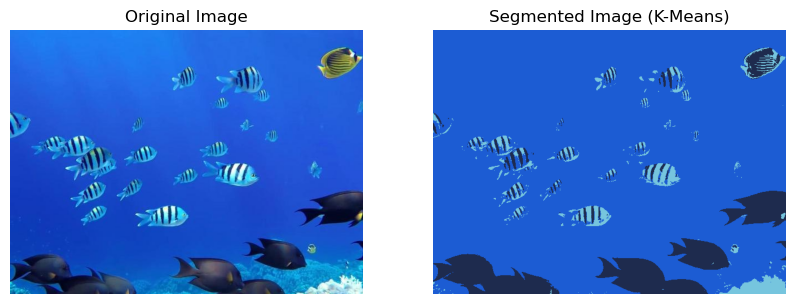

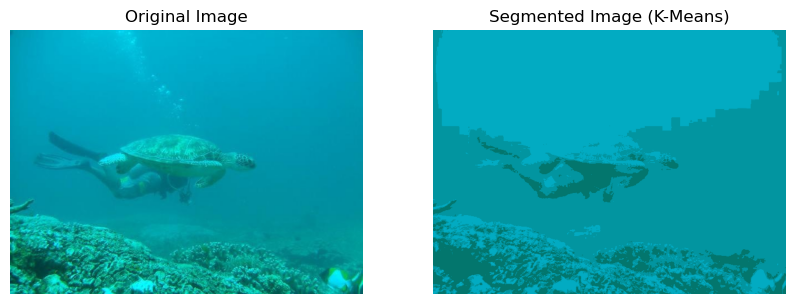

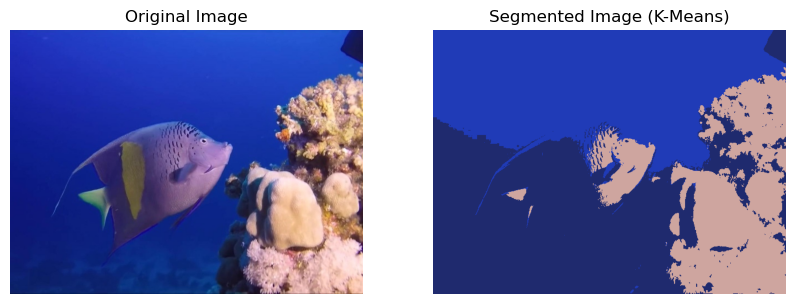

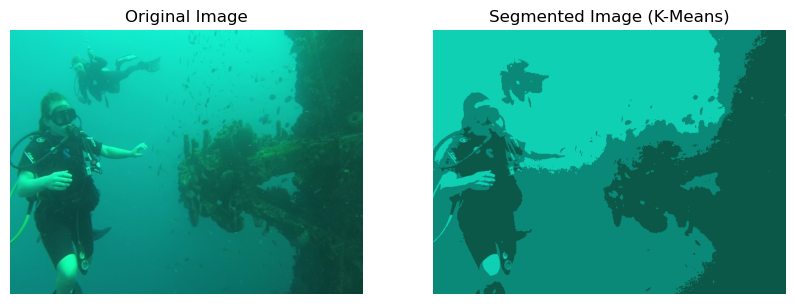

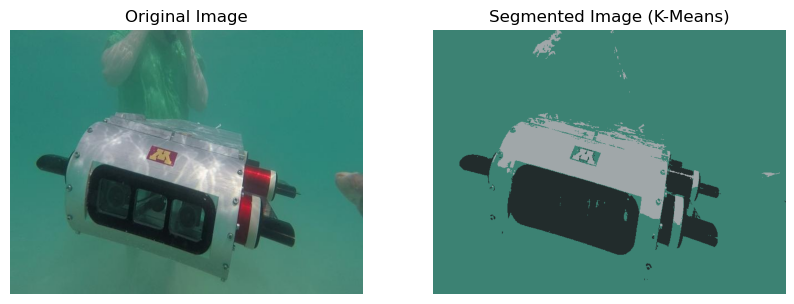

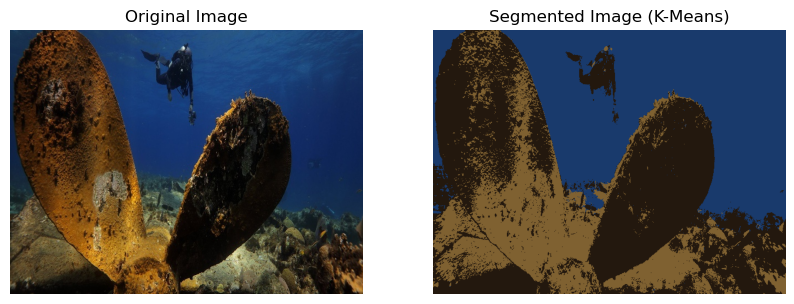

Segmentation completed and saved to: C:/Users/USER/Desktop/test/masks


In [54]:
# Process each image in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Modify for other image formats if needed
        image_path = os.path.join(image_folder, filename)
        segmented_image = segment_kmeans(image_path, k=3)
        
        # Save segmented image
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))
        
        # Display the original and segmented images
        original = cv2.imread(image_path)
        original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original)
        plt.title("Original Image")
        plt.axis("off")
        
        plt.subplot(1, 2, 2)
        plt.imshow(segmented_image)
        plt.title("Segmented Image (K-Means)")
        plt.axis("off")
        
        plt.show()

print("Segmentation completed and saved to:", output_folder)


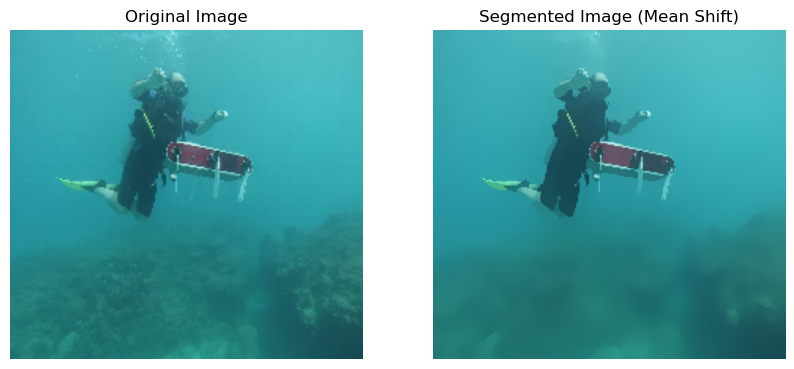

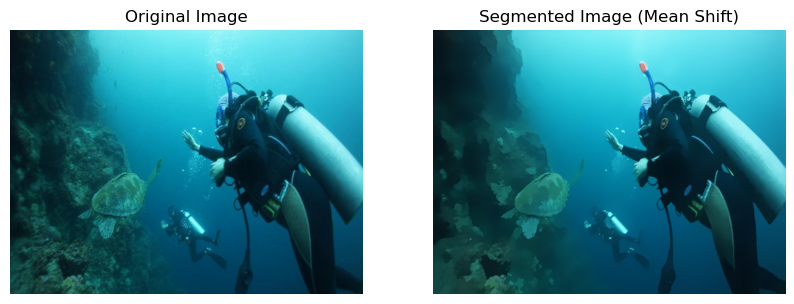

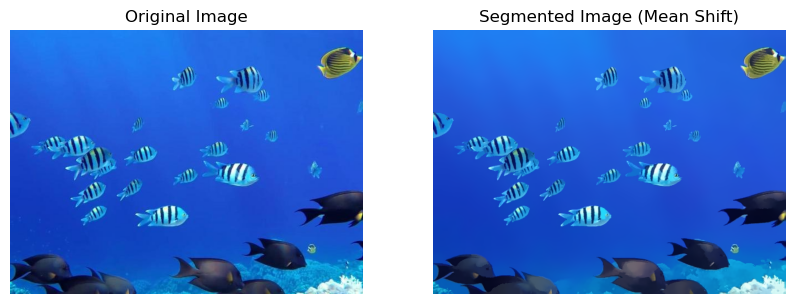

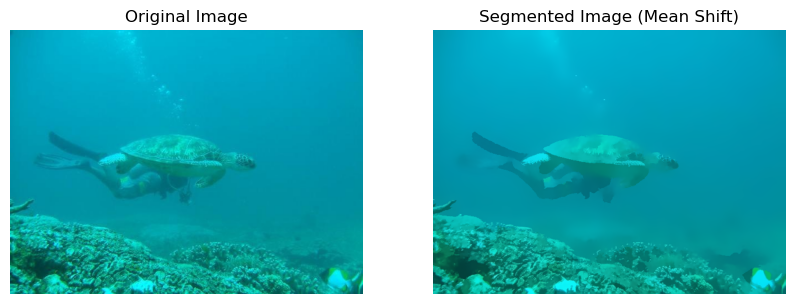

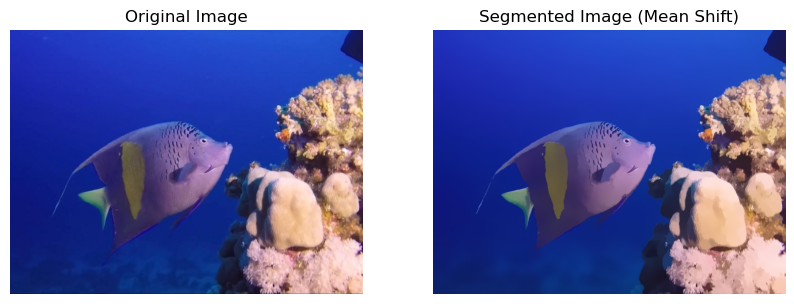

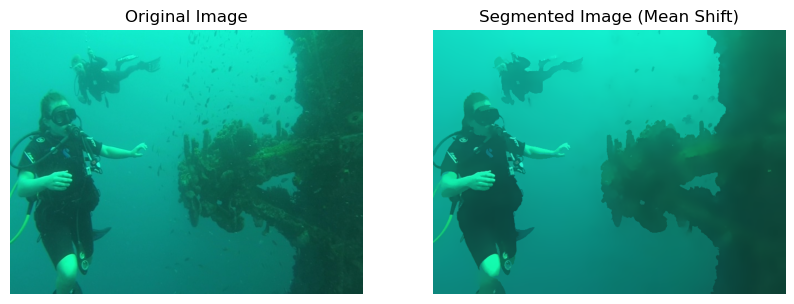

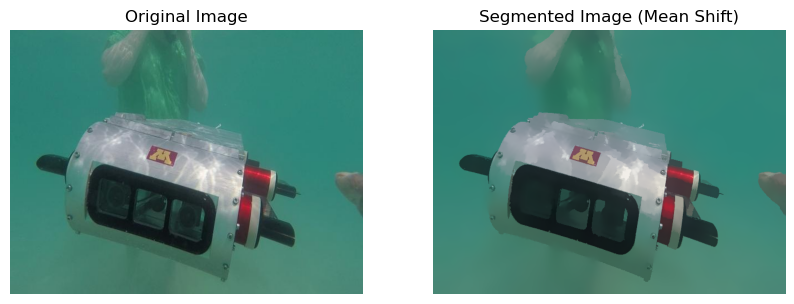

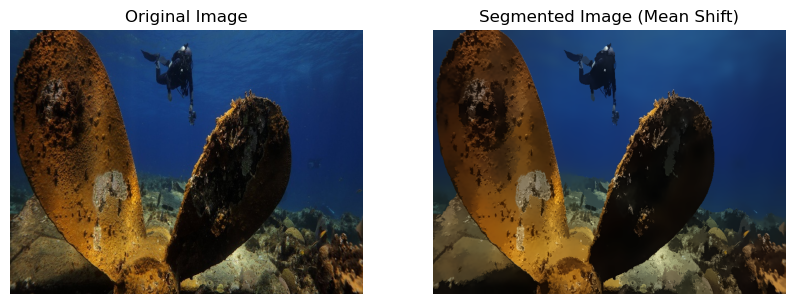

Mean Shift segmentation completed for all images.


In [55]:
def mean_shift_segmentation(image_path, spatial_radius=10, color_radius=20, max_pyramid_level=1):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Apply Mean Shift Segmentation
    segmented_image = cv2.pyrMeanShiftFiltering(image, sp=spatial_radius, sr=color_radius, maxLevel=max_pyramid_level)
    
    return segmented_image

# Process all images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        segmented_img = mean_shift_segmentation(image_path)
        
        # Save the segmented image
        output_path = os.path.join(output_folder, filename)
        plt.imsave(output_path, segmented_img)
        
        # Display the result
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")
        
        plt.subplot(1, 2, 2)
        plt.imshow(segmented_img)
        plt.title("Segmented Image (Mean Shift)")
        plt.axis("off")
        
        plt.show()

print("Mean Shift segmentation completed for all images.")


In [56]:
import skimage.segmentation as seg
from skimage.color import label2rgb
from skimage.io import imread, imsave
import os

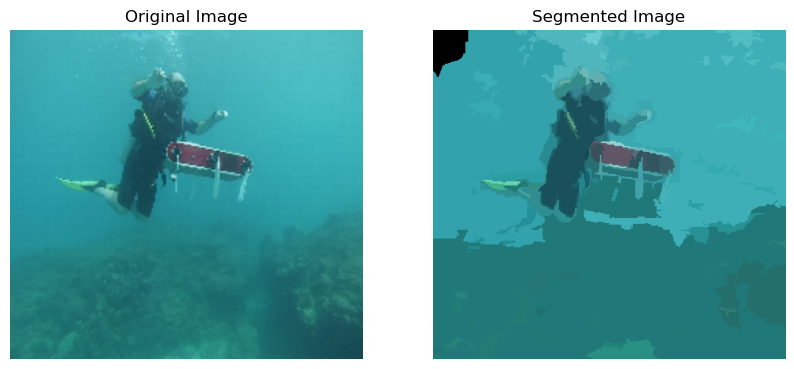

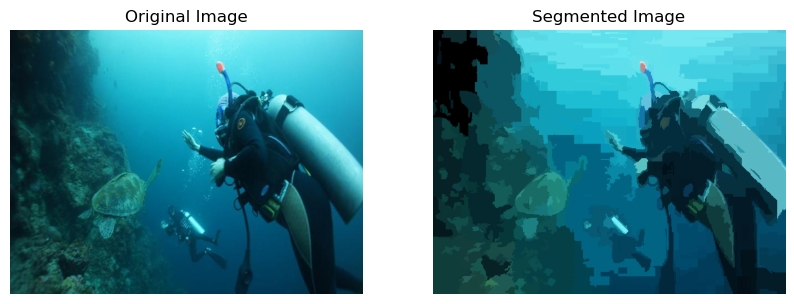

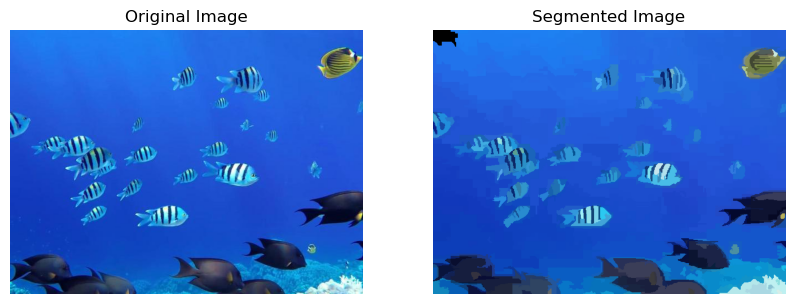

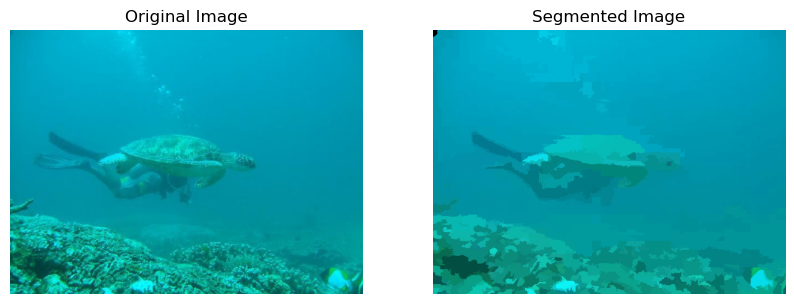

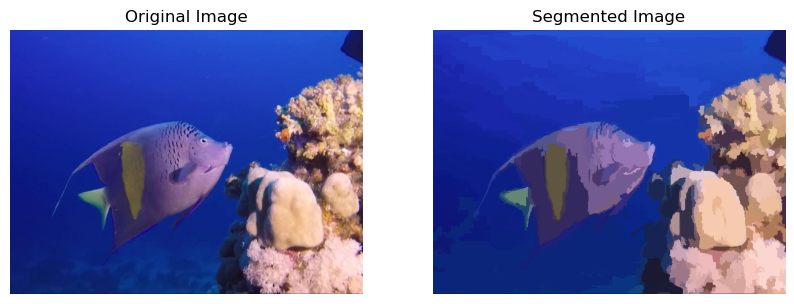

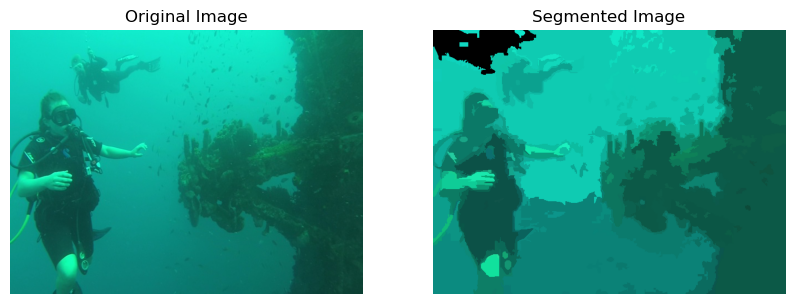

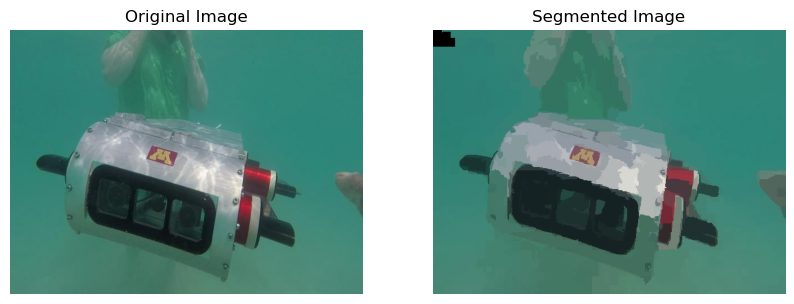

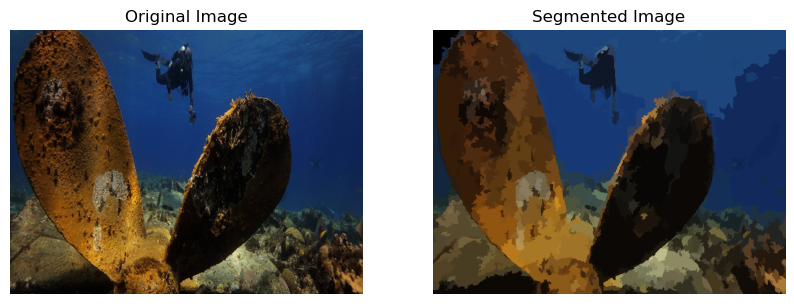

Segmentation completed and masks saved.


In [57]:
# List all images in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

for image_name in image_files:
    # Read the image
    image_path = os.path.join(image_folder, image_name)
    image = imread(image_path)
    
    # Apply graph-based segmentation (Felzenszwalb)
    segments = seg.felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
    
    # Convert segmented labels to color mask
    segmented_image = label2rgb(segments, image, kind='avg')
    
    # Save the segmented mask
    mask_path = os.path.join(output_folder, f"mask_{image_name}")
    imsave(mask_path, segmented_image)
    
    # Display the original and segmented images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    ax[1].imshow(segmented_image)
    ax[1].set_title("Segmented Image")
    ax[1].axis("off")
    
    plt.show()
    
print("Segmentation completed and masks saved.")


In [58]:

# Compute Adapted Rand Error (ARE) for boundary accuracy
def compute_are(segmented, ground_truth):
    are, _, _ = adapted_rand_error(ground_truth, segmented)
    return are

In [62]:
pip install --upgrade scikit-image


   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/12.8 MB 1.2 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/12.8 MB 1.3 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/12.8 MB 1.2 MB/s eta 0:00:10
   ---- ----------------------------------- 1.6/12.8 MB 1.2 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.8 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.8/12.8 MB 1.2 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/12.8 MB 1.2 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.8 MB 1.2 MB/s eta 0:00:09
   -------- ------------------------------- 2.6/12.8 MB 1.2 MB/s eta 0:00:09
   --------- ------------------------------ 2.9/12.8 MB 1.2 MB/s eta 0:00:09
   --------- 

  You can safely remove it manually.


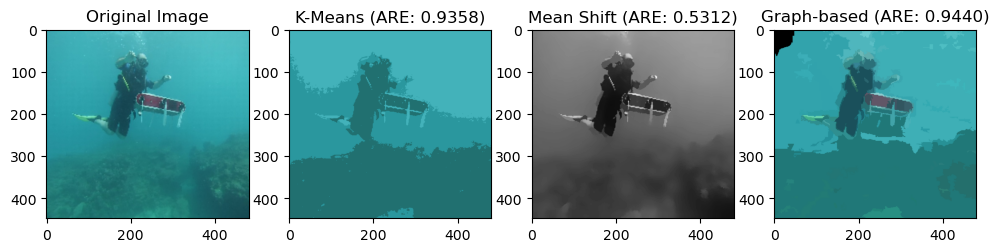

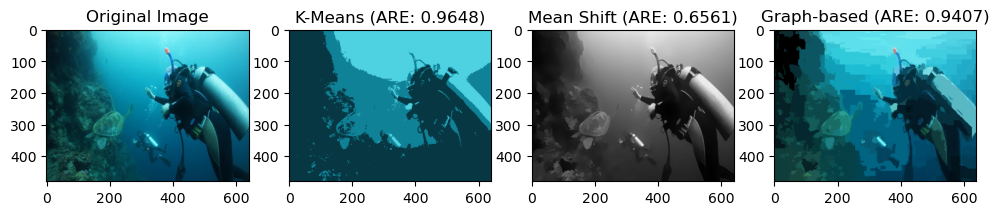

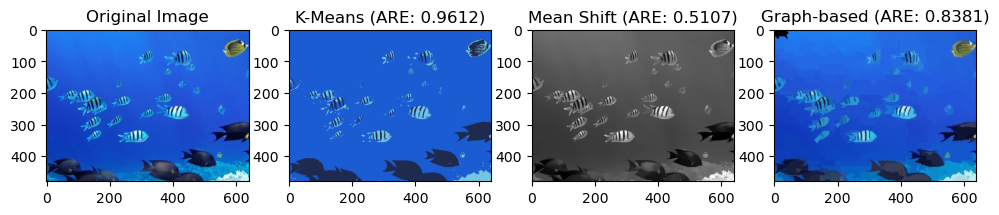

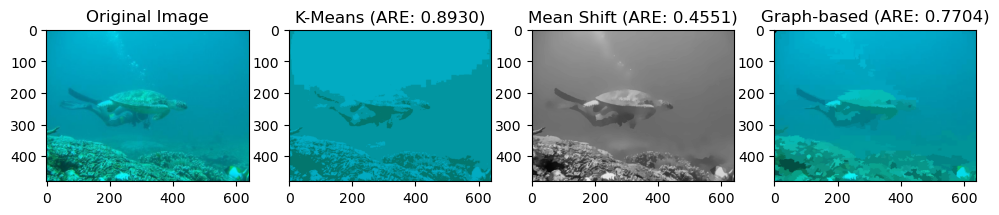

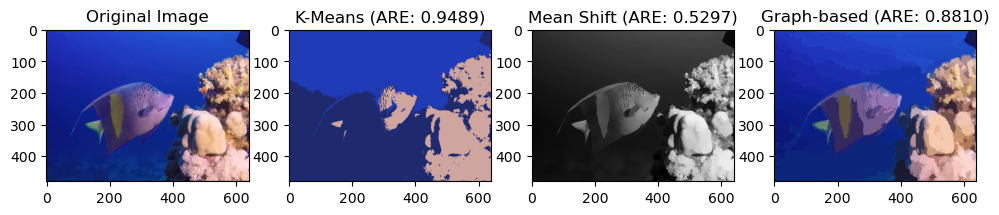

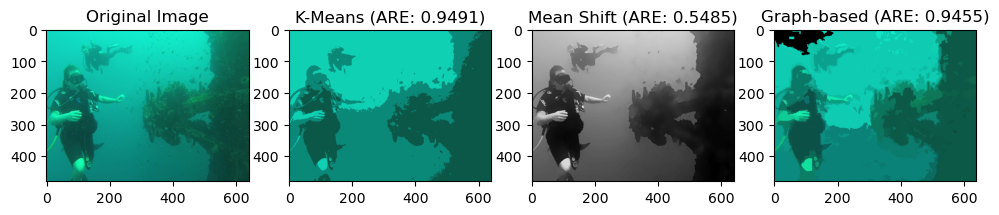

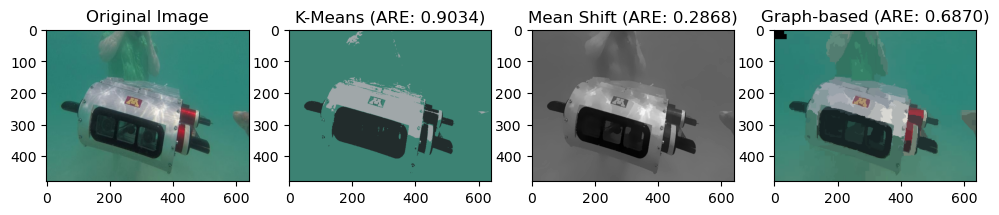

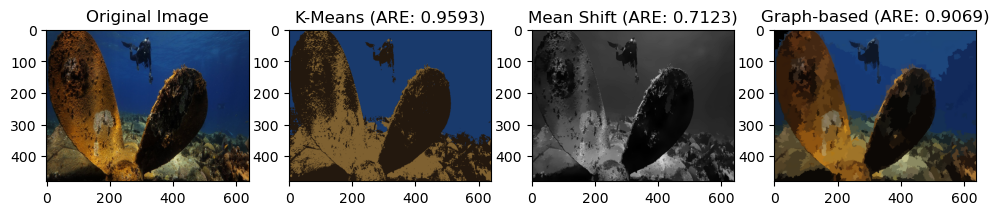

Best method: ('n_l_52_.jpg', 0.9034189853979894, 0.2867927333257523, 0.6870435137079739)


In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg
from skimage.color import label2rgb
from skimage.metrics import adapted_rand_error
from skimage.io import imread, imsave
import os
from sklearn.cluster import KMeans

# Folder paths
image_folder = "C:/Users/USER/Desktop/test/images/"  # Change to actual path
mask_folder = "C:/Users/USER/Desktop/test/masks/"  # Ground truth masks
output_folder = "C:/Users/USER/Desktop/test/segmented/"

os.makedirs(output_folder, exist_ok=True)

# Function for K-Means segmentation
def segment_kmeans(image_path, k=3):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    pixel_values = image.reshape((-1, 3)).astype(np.float32)
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()].reshape(image.shape)
    
    return segmented_image

# Function for Mean Shift segmentation
def mean_shift_segmentation(image_path, spatial_radius=10, color_radius=20, max_pyramid_level=1):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    segmented_image = cv2.pyrMeanShiftFiltering(image, sp=spatial_radius, sr=color_radius, maxLevel=max_pyramid_level)
    
    return segmented_image

# Function for Graph-based segmentation
def graph_segmentation(image_path):
    image = imread(image_path)
    segments = seg.felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
    
    segmented_image = label2rgb(segments, image, kind='avg')
    
    return segmented_image

# Compute Adapted Rand Error (ARE)
def compute_are(segmented, ground_truth):
    # Ensure both images are grayscale (single channel)
    if len(segmented.shape) == 3:
        segmented = cv2.cvtColor(segmented, cv2.COLOR_RGB2GRAY)
    if len(ground_truth.shape) == 3:
        ground_truth = cv2.cvtColor(ground_truth, cv2.COLOR_RGB2GRAY)
    
    # Resize segmented image to match the ground truth dimensions
    segmented_resized = cv2.resize(segmented, (ground_truth.shape[1], ground_truth.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Compute Adapted Rand Error
    are, _, _ = adapted_rand_error(ground_truth, segmented_resized)
    return are

# Store results
results = []

# Process each image
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        image_path = os.path.join(image_folder, filename)
        mask_path = os.path.join(mask_folder, filename)

        if not os.path.exists(mask_path):  # Ensure ground truth mask exists
            continue

        # Read mask (ground truth)
        mask = cv2.imread(mask_path, 0)

        # Apply segmentation methods
        kmeans_result = segment_kmeans(image_path, k=3)
        mean_shift_result = mean_shift_segmentation(image_path)
        graph_result = graph_segmentation(image_path)

        # Convert Mean Shift result to grayscale for evaluation
        mean_shift_gray = cv2.cvtColor(mean_shift_result, cv2.COLOR_RGB2GRAY)

        # Compute accuracy using ARE
        are_kmeans = compute_are(kmeans_result, mask)
        are_meanshift = compute_are(mean_shift_gray, mask)
        are_graph = compute_are(graph_result, mask)

        # Store results
        results.append((filename, are_kmeans, are_meanshift, are_graph))

        # Save segmented images
        cv2.imwrite(os.path.join(output_folder, f"kmeans_{filename}"), cv2.cvtColor(kmeans_result, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(output_folder, f"meanshift_{filename}"), cv2.cvtColor(mean_shift_result, cv2.COLOR_RGB2BGR))
        imsave(os.path.join(output_folder, f"graph_{filename}"), graph_result)

        # Display results
        fig, ax = plt.subplots(1, 4, figsize=(12, 4))
        ax[0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        ax[0].set_title("Original Image")

        ax[1].imshow(kmeans_result)
        ax[1].set_title(f"K-Means (ARE: {are_kmeans:.4f})")

        ax[2].imshow(mean_shift_gray, cmap="gray")
        ax[2].set_title(f"Mean Shift (ARE: {are_meanshift:.4f})")

        ax[3].imshow(graph_result)
        ax[3].set_title(f"Graph-based (ARE: {are_graph:.4f})")

        plt.show()

# Determine best method based on lowest ARE score
best_method = min(results, key=lambda x: min(x[1:]))
print(f"Best method: {best_method}")
